# Detector Rates
The purpose of this notebook is to determine the relationship between bin values and actual energies.

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import lmfit as lf
import matplotlib.pyplot as plt
from scipy.interpolate import InterpolatedUnivariateSpline as interp

In [2]:
#Import data
data = pd.read_csv ("data/PuBe_raised_FullShielding_scanrate.csv")
old = pd.read_csv("../UniversalTrigger2/data/scanrate_06022022_3.csv")
new = pd.read_csv("data/no_PuBe_FixedBoron_scanrate.csv")
threshold = data.iloc[:,0]
thresh_old = old.iloc[:,0]
thresh_new = new.iloc[:,0]
rate = data.iloc[:,1]
rate_old = old.iloc[:,1]
rate_new = new.iloc[:,1]

#Cut an ill-behaved region
#"""
rate = rate[threshold > 220]
rate_old = rate_old[thresh_old > 220]
rate_new = rate_new[thresh_new > 220]
threshold = threshold[threshold > 220]
thresh_old = thresh_old[thresh_old > 220]
thresh_new = thresh_new[thresh_new > 220]
#"""

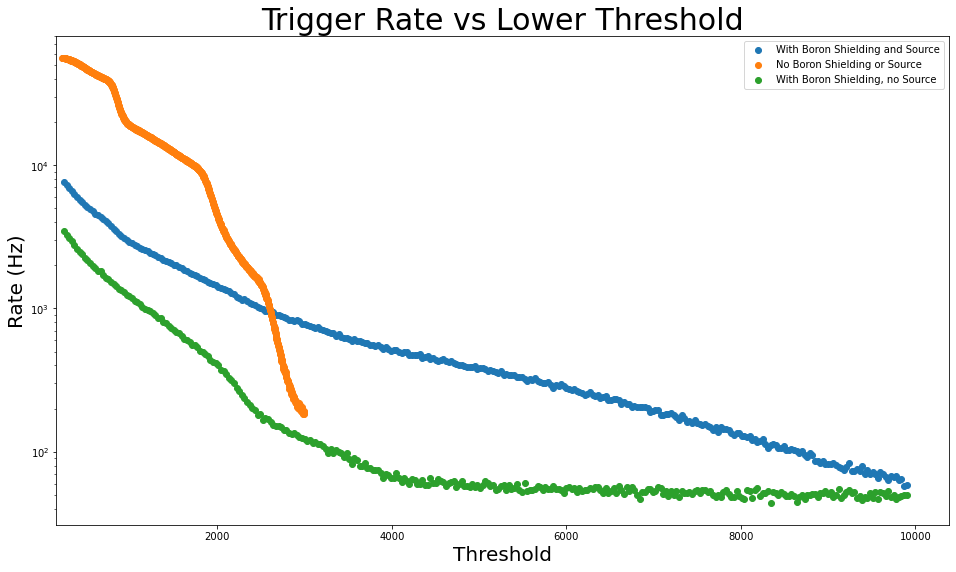

In [3]:
plt.figure(figsize=(16,9))

plt.scatter(threshold,rate,label='With Boron Shielding and Source')
plt.scatter(thresh_old,rate_old,label='No Boron Shielding or Source')
plt.scatter(thresh_new,rate_new,label='With Boron Shielding, no Source')

plt.xlabel("Threshold",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.title("Trigger Rate vs Lower Threshold",size=30)
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels
plt.yscale('log')
plt.xlim(150)
#plt.ylim(0)

plt.legend()
plt.show()

In [4]:
diffs = np.zeros(len(threshold))
for i,n in enumerate(rate):
    try:
        diffs[i] = rate[i-1] - n
    except KeyError:
        diffs[i] = np.nan
        
diffs_old = np.zeros(len(thresh_old))
for i,n in enumerate(rate_old):
    try:
        diffs_old[i] = rate_old[i-1] - n
    except KeyError:
        diffs_old[i] = np.nan
        
diffs_new = np.zeros(len(thresh_new))
for i,n in enumerate(rate_new):
    try:
        diffs_new[i] = rate_new[i-1] - n
    except KeyError:
        diffs_new[i] = np.nan

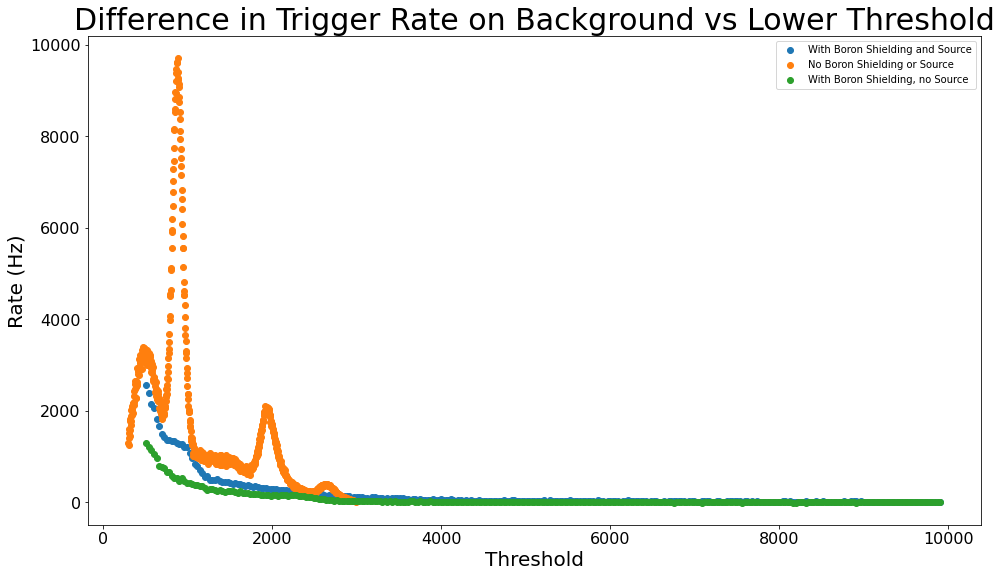

In [5]:
plt.figure(figsize=(16,9))

plt.scatter(threshold,diffs,label='With Boron Shielding and Source')
plt.scatter(thresh_old,diffs_old,label='No Boron Shielding or Source')
plt.scatter(thresh_new,diffs_new,label='With Boron Shielding, no Source')

plt.xlabel("Threshold",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.title("Difference in Trigger Rate on Background vs Lower Threshold",size=30)
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels
#plt.xlim(5000)
#plt.ylim(0)

"""
plt.axvline(880)
plt.text(885,500,"511 keV at bin ~880")
plt.axvline(1940)
plt.text(1945,4000,"1274 keV at bin ~1940")
plt.axvline(2650)
plt.text(2655,2000,"1785 keV at bin ~2650")
point = [880,511]
point2 = [1940,1274]
point3 = [2650, 1785]
"""

plt.legend()
plt.show()